# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: Jackson

Student name: Jake
    
ID: 2046805

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2046805
np.random.seed(ID)

In [4]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600 #small just for low computers
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [74 62 64 52 67 60 47 70 51 53]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


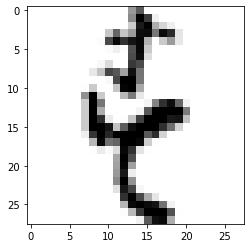

LABEL: 2
INPUT:


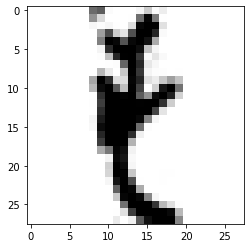

LABEL: 2
INPUT:


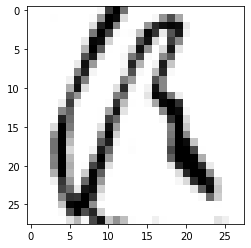

LABEL: 2
INPUT:


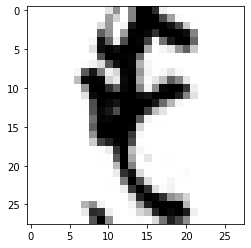

LABEL: 2


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.01, 0.1, 1, 10]} # C=1/lamda 


#train linear SVM

print ('RESULTS FOR LINEAR KERNEL')
SVC_lin = SVC(kernel='linear')
SVC_lin.fit(X_train, y_train) 
SVC_pred = SVC_lin.predict(X_test) 
#print(classification_report(y_test, SVC_pred))

print("Best parameters set found:")

grid_lin = GridSearchCV(SVC_lin,
                      param_grid=parameters,
                      cv=4)

grid_lin.fit(X_train, y_train)
print(grid_lin.best_params_)

print("Score with best parameters:")
best_score = grid_lin.best_score_
print(best_score)

print("All scores on the grid:")
grid_lin_pred= grid_lin.predict(X_test) 
print(grid_lin.cv_results_['params'])
print(grid_lin.cv_results_['mean_test_score'])

RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 0.01}
Score with best parameters:
0.7716666666666667
All scores on the grid:
[{'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}]
[0.77166667 0.75333333 0.75333333 0.75333333]


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel

SVC_poly2 = SVC(kernel='poly', degree=2)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')
print("Best parameters set found:")

grid_poly2 = GridSearchCV(SVC_poly2,
                      param_grid=parameters,
                      cv=4)

grid_poly2.fit(X_train, y_train)
print(grid_poly2.best_params_)

print("Score with best parameters:")
best_score = grid_poly2.best_score_
print(best_score)

print("\nAll scores on the grid:")
print(grid_poly2.cv_results_['params'])
print(grid_poly2.cv_results_['mean_test_score'])

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 0.1, 'gamma': 0.1}
Score with best parameters:
0.795

All scores on the grid:
[{'C': 0.01, 'gamma': 0.01}, {'C': 0.01, 'gamma': 0.1}, {'C': 0.01, 'gamma': 1}, {'C': 0.1, 'gamma': 0.01}, {'C': 0.1, 'gamma': 0.1}, {'C': 0.1, 'gamma': 1}, {'C': 1, 'gamma': 0.01}, {'C': 1, 'gamma': 0.1}, {'C': 1, 'gamma': 1}]
[0.12333333 0.79       0.78833333 0.495      0.795      0.78833333
 0.79       0.78833333 0.78833333]


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of higher degree kernel
degree = 3

SVC_poly3 = SVC(kernel='poly', degree=3)
grid_poly3 = GridSearchCV(SVC_poly3,
                      param_grid=parameters,
                      cv=4)
grid_poly3.fit(X_train, y_train)
print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')
print("Best parameters set found:")

print(grid_poly3.best_params_)

print("Score with best parameters:")
best_score = grid_poly3.best_score_
print(best_score)

print("\nAll scores on the grid:")
print(grid_poly3.cv_results_['params'])
print(grid_poly3.cv_results_['mean_test_score'])

RESULTS FOR POLY DEGREE= 3  KERNEL
Best parameters set found:
{'C': 0.01, 'gamma': 0.1}
Score with best parameters:
0.7366666666666666

All scores on the grid:
[{'C': 0.01, 'gamma': 0.01}, {'C': 0.01, 'gamma': 0.1}, {'C': 0.01, 'gamma': 1}, {'C': 0.1, 'gamma': 0.01}, {'C': 0.1, 'gamma': 0.1}, {'C': 0.1, 'gamma': 1}, {'C': 1, 'gamma': 0.01}, {'C': 1, 'gamma': 0.1}, {'C': 1, 'gamma': 1}]
[0.12333333 0.73666667 0.72166667 0.40666667 0.72166667 0.72166667
 0.70833333 0.72166667 0.72166667]


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel

SVC_rbf = SVC(kernel='rbf')
SVC_rbf.fit(X_train, y_train) 
grid_rbf = GridSearchCV(SVC_rbf,
                      param_grid=parameters,
                      cv=4)
grid_rbf.fit(X_train, y_train)
print ('RESULTS FOR rbf KERNEL')
print("Best parameters set found:")
print(grid_rbf.best_params_)

print("Score with best parameters:")
best_score = grid_rbf.best_score_
print(best_score)

print("\nAll scores on the grid:")
print(grid_rbf.cv_results_['params'])
print(grid_rbf.cv_results_['mean_test_score'])

RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.8166666666666667

All scores on the grid:
[{'C': 0.1, 'gamma': 0.001}, {'C': 0.1, 'gamma': 0.01}, {'C': 0.1, 'gamma': 0.1}, {'C': 0.1, 'gamma': 1}, {'C': 1, 'gamma': 0.001}, {'C': 1, 'gamma': 0.01}, {'C': 1, 'gamma': 0.1}, {'C': 1, 'gamma': 1}, {'C': 10, 'gamma': 0.001}, {'C': 10, 'gamma': 0.01}, {'C': 10, 'gamma': 0.1}, {'C': 10, 'gamma': 1}, {'C': 100, 'gamma': 0.001}, {'C': 100, 'gamma': 0.01}, {'C': 100, 'gamma': 0.1}, {'C': 100, 'gamma': 1}]
[0.12333333 0.23666667 0.12333333 0.12333333 0.63       0.79333333
 0.135      0.12333333 0.78333333 0.81666667 0.14       0.12333333
 0.78166667 0.81666667 0.14       0.12333333]


## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?


rbf had the best score
Best value comparison

linear {'C': 0.01} 0.7716666666666667

poly2 {'C': 0.1, 'gamma': 0.1} 0.795

poly3 {'C': 0.01, 'gamma': 0.1} 0.7366666666666666

rbf {'C': 10, 'gamma': 0.01} 0.8166666666666667

## TO DO 5
Report here the best SVM kernel and parameters

In [13]:
#get training and test error for the best SVM model from CV
print('Best value comparison')

print('linear',  grid_lin.best_params_, grid_lin.best_score_)
print('poly2',  grid_poly2.best_params_, grid_poly2.best_score_)
print('poly3',  grid_poly3.best_params_, grid_poly3.best_score_)
print('rbf',  grid_rbf.best_params_, )

best_SVM = SVC(kernel='rbf', gamma=0.01)
best_SVM.fit(X_train, y_train)


best_SVM_score = best_SVM.score(X_test,y_test)

#test_t = best_SVM.score(X_train,y_train) why isnt this the same 

#print(test_t, grid_rbf.best_score_)
training_error = 1 - grid_rbf.best_score_
# (error is 1 - svm.score)
test_error = 1 - best_SVM_score
print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best value comparison
linear {'C': 0.01} 0.7716666666666667
poly2 {'C': 0.1, 'gamma': 0.1} 0.795
poly3 {'C': 0.01, 'gamma': 0.1} 0.7366666666666666
rbf {'C': 10, 'gamma': 0.01}
Best SVM training error: 0.183333
Best SVM test error: 0.203250


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [14]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


In [ ]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

for g in gamma_values:
    print('Gamma = ', g)
    SVM_rbf_gamma = SVC(kernel='rbf', gamma=g, C=1)
    SVM_rbf_gamma.fit(X_train,y_train)
    y_p_test = SVM_rbf_gamma.predict(X_test)
    y_p_train = SVM_rbf_gamma.predict(X_train)
    train_acc_list.append(SVM_rbf_gamma.score(X_train,y_p_train))
    test_acc_list.append(SVM_rbf_gamma.score(X_test,y_p_test))

    
# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

Gamma =  1e-05
Gamma =  0.0001


## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [16]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [187 208 208 205 175 189 204 223 209 192]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [18]:
#get training and test error for the best SVM model from CV

b_SVM_2000 = SVC(kernel='rbf', gamma=0.01)
b_SVM_2000.fit(X_train, y_train)

b_SVM_2000_train_score = b_SVM_2000.score(X_train,y_train)
b_SVM_2000_test_score = b_SVM_2000.score(X_test,y_test)


train_error = 1 - b_SVM_2000_train_score
test_error = 1 - b_SVM_2000_test_score

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.183333
Best SVM test error: 0.128448


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [24]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=1e5) #a large C disables regularization
logreg.fit(X_train,y_train)

logreg_train_score = logreg.score(X_train,y_train)
logreg_test_score = logreg.score(X_test,y_test)

train_error = 1 - logreg_train_score
test_error = 1 - logreg_test_score

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.183333
Best logistic regression test error: 0.286897


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## TO DO 9 Try  with regularization (use C=1)¶

In [23]:
logreg = linear_model.LogisticRegression(C=1) #a large C disables regularization
logreg.fit(X_train,y_train)

logreg_train_score = logreg.score(X_train,y_train)
logreg_test_score = logreg.score(X_test,y_test)

train_error = 1 - logreg_train_score
test_error = 1 - logreg_test_score

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.183333
Best regularized logistic regression test error: 0.260741


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

In [ ]:
LR_prediction = # ADD CODE
SVM_prediction = # ADD CODE

# ADD CODE

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [ ]:
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = # ADD CODE
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR =  # ADD CODE
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

In [ ]:
# ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX


## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.
